# From Python to Numpy
https://www.labri.fr/perso/nrougier/from-python-to-numpy/#anatomy-of-an-array

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import sys
import os

First, we have to distinguish between indexing and fancy indexing. The first will always return a view while the second will return a copy. This difference is important because in the first case, modifying the view modifies the base array while this is not true in the second case

In [2]:
Z = np.zeros(9)

In [3]:
Z = np.zeros(9)
Z_view = Z[:3]
Z_view[...] = 1
print(Z)

[1. 1. 1. 0. 0. 0. 0. 0. 0.]


In [4]:
Z = np.zeros(9)
Z_copy = Z[[0,1,2]]
Z_copy[...] = 1
print(Z)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [5]:
Z.dtype

dtype('float64')

If you are unsure if the result of your indexing is a view or a copy, you can check what is the base of your result. If it is None, then you result is a copy

In [6]:
Z = np.random.uniform(0,1,(5,5))
Z1 = Z[:3,:]
Z2 = Z[[0,1,2], :]
print(np.allclose(Z1,Z2))
print(Z1.base is Z)
print(Z2.base is Z)
print(Z2.base is None)
print(Z)

True
True
False
True
[[0.68683    0.60556104 0.60493093 0.6674158  0.45633715]
 [0.49050883 0.40287395 0.76329879 0.87651737 0.88683344]
 [0.6757373  0.59730631 0.71034169 0.4785848  0.07501505]
 [0.88003688 0.09072666 0.2426284  0.91245222 0.64600826]
 [0.89870538 0.19348944 0.36954192 0.0020976  0.88233347]]


In [7]:
Z = np.arange(9).reshape(3,3).astype(np.int16)

In [8]:
Z.shape[1]*Z.itemsize, Z.itemsize

(6, 2)

In [9]:
Z.shape[1]

3

# Game of Life

In [46]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

In [47]:
type(Z)

list

In [48]:
Z = np.array(Z)

In [54]:
shape = len(Z), len(Z[0])
N  = [[0,]*(shape[0]) for i in range(shape[1])]

In [55]:
def compute_neighbours(Z):
    shape = len(Z), len(Z[0])
    N  = [[0,]*(shape[0]) for i in range(shape[1])]
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [56]:
compute_neighbours(Z)

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [57]:
def iterate(Z):
    N = compute_neighbours(Z)
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
             if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                 Z[x][y] = 0
             elif Z[x][y] == 0 and N[x][y] == 3:
                 Z[x][y] = 1
    return Z

In [58]:
Z = np.random.randint(2, size=(512, 512))

In [61]:
for i in range(500):
#     print ("Saving image")
#     print (Z*255)
    img = Image.fromarray(Z*255, 'L')
    img.save(str('gol/' + str(i).zfill(4) + 'gol.png'))
    iterate(Z)

In [42]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [43]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [19]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [20]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [21]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [22]:
iterate(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [23]:
N = np.zeros(Z.shape, dtype=int)
print(N)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [24]:
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

In [25]:
N[1:-1,1:-1] += (Z[ :-2, :-2])

In [26]:
N[1:-1,1:-1].shape

(4, 4)

In [27]:
print(N)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 0 1 3 2 0]
 [0 0 1 2 2 0]
 [0 0 0 0 0 0]]


In [28]:
(Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 3, 2],
       [0, 1, 2, 2]])

In [29]:
Z[2:  ,2:]

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 0]])

In [30]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

For the rule enforcement, we can write a first version using NumPy's argwhere method that will give us the indices where a given condition is True.

In [33]:
# Flatten arrays
N_ = N.ravel()
Z_ = Z.ravel()

# Apply rules
R1 = np.argwhere( (Z_==1) & (N_ < 2) )
R2 = np.argwhere( (Z_==1) & (N_ > 3) )
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )
R4 = np.argwhere( (Z_==0) & (N_==3) )

# Set new values
Z_[R1] = 0
Z_[R2] = 0
Z_[R3] = Z_[R3]
Z_[R4] = 1

# Make sure borders stay null
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [34]:
Z_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [36]:
Z_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [37]:
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
Z[...] = 0
Z[1:-1,1:-1][birth | survive] = 1

In [38]:
(N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [39]:
Z[1:-1,1:-1]==0

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False, False],
       [ True,  True, False, False]])

In [40]:
(N==3)[1:-1,1:-1]

array([[False, False, False, False],
       [False, False, False, False],
       [False, False,  True, False],
       [False, False, False, False]])

In [68]:
Z = Z*255

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 255., 255.,   0.],
       [  0.,   0.,   0., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.]])

In [62]:
arr = np.zeros((6, 6), np.float)
arr = np.array(np.round(arr), dtype=np.uint8)
arr

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [72]:
img = Image.fromarray(Z, 'L')
img.save('image.png')
img.show()

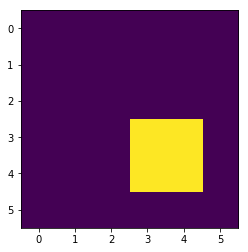

In [73]:
plt.imshow(Z)

In [71]:
w, h = 512, 512
data = np.zeros((h, w, 3), dtype=np.uint8)
data[256, 256] = [255, 0, 0]
img = Image.fromarray(Z, 'RGB')
img.save('my.png')
img.show()

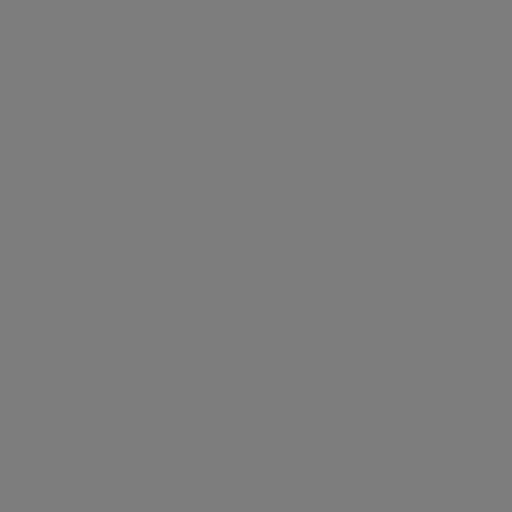

In [82]:
data2 = np.zeros((h, w), dtype=np.uint8)
data2[:,:] = 125
img = Image.fromarray(data2, 'L')
img

In [79]:
data2[:,:] = 255
data2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [84]:
data2+=1

In [85]:
data2

array([[126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       ...,
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126],
       [126, 126, 126, ..., 126, 126, 126]], dtype=uint8)